# Word2Vec model 
<b>Model training a on large dataset

<b>Install libraries if needed

In [97]:
#!pip install spacy
#!python -m spacy download en
#!pip install bs4
#!pip install lxml

### 1. Import all nesessary libraries

In [52]:
import re, string 
import pandas as pd 
from time import time  
from collections import defaultdict
import spacy
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from gensim.models import Word2Vec
from bs4 import BeautifulSoup
import re, string
%matplotlib inline

###### IMDB Dataset of 50K movies reviews 
<a href ="https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?select=IMDB+Dataset.csv">Source </a>

### 2. Load and look at the data from a file containing raw text for movies reviews

In [99]:
df1 = pd.read_csv('Data/IMDB Dataset.csv')
df1 = df1[["review"]] 
df1

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...
49995,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...


### 3. Preparing the data (cleaning text)

In [101]:
clean = []
for doc in df1['review']:
    t = doc.lower() # lower case
    t = BeautifulSoup(t,'html.parser').text #remove tags
    t = re.sub('[^A-Za-z0-9]+',' ',t)
    clean.append(t)
df1['clean']= clean    


<b>--> Look at the text after cleaning(preprocessing)

In [102]:
df1.head()

,review,clean
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei s love in the time of money is a...


<b>--> The training sample size (how many words present in the vocabulary?)

In [105]:
sentences = [row.split() for row in df1['clean']]
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1

print('Sentences:',len(sentences))
print('Words:',len(word_freq))

Sentences: 50000
Words: 103435


<b>--> What are highly frequent words?

In [108]:
sorted(word_freq, key=word_freq.get, reverse= True)[:10]


['the', 'and', 'a', 'of', 'to', 'is', 'it', 'in', 'i', 'this']

### 4. Define Word2Vec model

In [110]:
w2v_model = Word2Vec(min_count=1,
                     window=5,
                     size=100,
                     workers=4)

### 5. Build a vocabulary

In [111]:
w2v_model.build_vocab(sentences)

### 6. Train the model

In [36]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.iter)
# As we do not plan to train the model any further, 
# we are calling init_sims(), to male it Memory-efficient
w2v_model.init_sims(replace=True)

/Applications/anaconda3/envs/Practice_ML/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(368105, 480995)

### 7. Explore the model

<b>--> Most similar words for a given word

In [136]:
# Explore the model
w = 'comedy'
w2v_model.wv.most_similar(positive=[w])

[('figgy', 0.4585677981376648),
 ('souls', 0.4219147264957428),
 ('maison', 0.41044050455093384),
 ('scaling', 0.4064280390739441),
 ('partido', 0.3814406991004944),
 ('benetakos', 0.3802940249443054),
 ('traffics', 0.37971746921539307),
 ('combatants', 0.3762507140636444),
 ('fawned', 0.3761526048183441),
 ('gadda', 0.37452274560928345)]

<b>--> Top 5 similar words

In [116]:
w = 'horror'
w2v_model.wv.most_similar(positive=[w],topn =6)

[('loosly', 0.4030660092830658),
 ('quarries', 0.3970834016799927),
 ('phenomena', 0.3949154019355774),
 ('blyth', 0.3932012915611267),
 ('1865', 0.3871738910675049),
 ('employed', 0.3858538866043091)]

<b>--> Similarity between two words

In [124]:
u = 'he'; v = 'steven'
w2v_model.wv.similarity(u,v)

-0.22258782

<b>--> Plot embeddings</b><br>
  Consider some informative terms in the vocabulary  

In [ ]:
# 50 informative terms that compose our model vocabulary 
informative_terms = ("bad", "great", "best", "worst", "fun", "beautiful",
                     "excellent", "poor", "boring", "awful", "terrible",
                     "definitely", "perfect", "liked", "worse", "waste",
                     "entertaining", "loved", "unfortunately", "amazing",
                     "enjoyed", "favorite", "horrible", "brilliant", "highly",
                     "simple", "annoying", "today", "hilarious", "enjoyable",
                     "dull", "fantastic", "poorly", "fails", "disappointing",
                     "disappointment", "not", "him", "her", "good", "time",
                      "movie", "film", "action", "comedy",
                     "drama", "family", "dialogue","plot","acting")

<b>--> Define and call a function to plot (using TSNE tool) 

/Applications/anaconda3/envs/Practice_ML/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


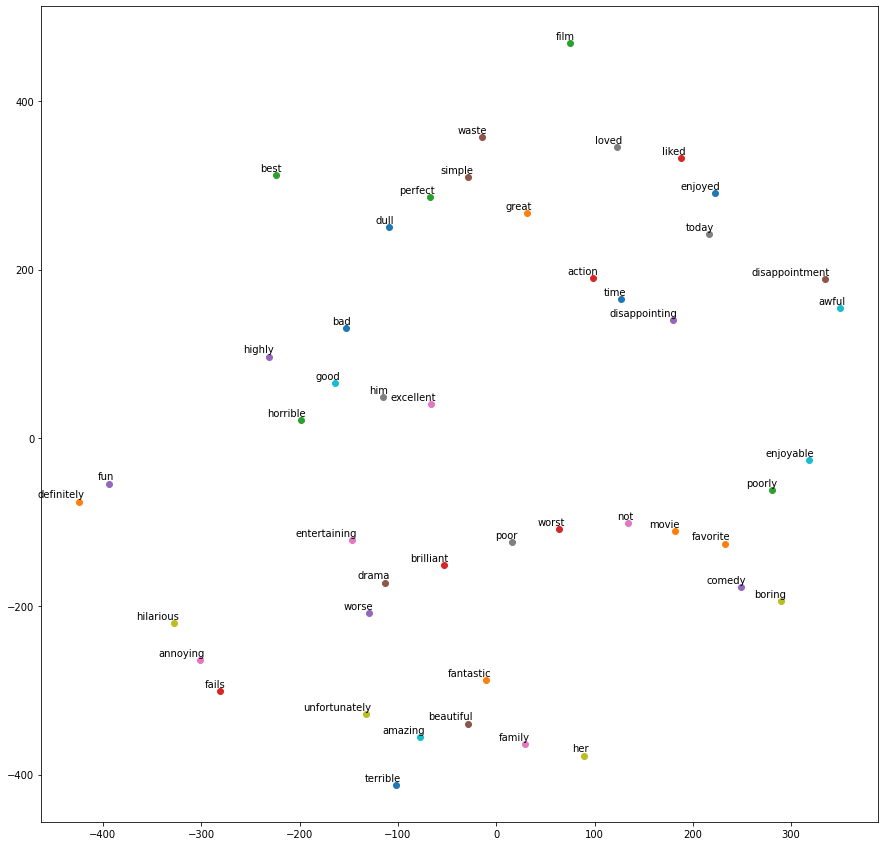

In [126]:
## define a function to plot 
import matplotlib.pyplot as plt
def tsne_plot(model,words_labels):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in words_labels:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15, 15)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
 ## call this function
tsne_plot(w2v_model,informative_terms)